# Molecular descriptors' calculation

As part of the process of collecting all the data that we need to train the predictive models, we need to calculate the four molecular descriptors considered in this project to represent the chemical properties and structural information of compounds:

1. RDKit 1D descriptors: We used the RDKit software to perform 1D descriptors calculation, which represent information calculated from the molecular formula.

2. ECFP4 fingerprints: Extended-Connectivity Fingerprints (ECFPs) are a type of circular topological fingerprint derived using a variant of the standard Morgan algorithm which contain structural information about compounds. In this study, we calculated the nonhashed, binary version of ECFPs of radius 2, called ECFP4, and 2048 and 1024 bits, employing the fingerprint algorithm implemented in the RDKit software.

3. Mordred descriptors: We used the Molfeat hub to compute over 1,800 physicochemical descriptors.

4. Physicochemical properties: We computed a list of 20 PC properties using the CLARITY ® software.

When handling an extensive array of descriptors, such as those found in the case of RDKit and Mordred descriptors, we perform descriptor selection to reduce dimensionality and eliminate redundancy in the descriptor set. This process involves two sequential steps:

* Identify and exclude invariant descriptors (i.e., those with variance equal to 0) and nearly invariant descriptors (i.e., those with matching values across >95% of molecules).

* Remove highly correlated descriptors. We adress redundancy by removing descriptors with the highest mean absolute correlation for every pair of descriptors with a Pearson Correlation Coefficient (PCC) greater than 0.9 

In [1]:
from src.utils import *

/opt/conda/envs/raquel_tfm/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


INFO:root:Loading the input data...
INFO:root:### RDKit 1D molecular descriptors ###
INFO:root:Constructing the RDKit Mol objects of all compounds...
INFO:root:··· Total number of Mol objects: 30402 ···
INFO:root:Computing the RDKit 1D descriptors for every compound...
INFO:root:Creating the final dataframe...
INFO:root:··· Total number of 1D descriptors = 210 x 30402 compounds ···
INFO:root:# Descriptor selection #
INFO:root:Finding the invariant and almost invariant descriptors...
INFO:root:··· Total number of invariant descriptors = 6 ···
INFO:root:··· Total number of almost invariant descriptors = 64 ···
INFO:root:Finding the highly correlated descriptors...


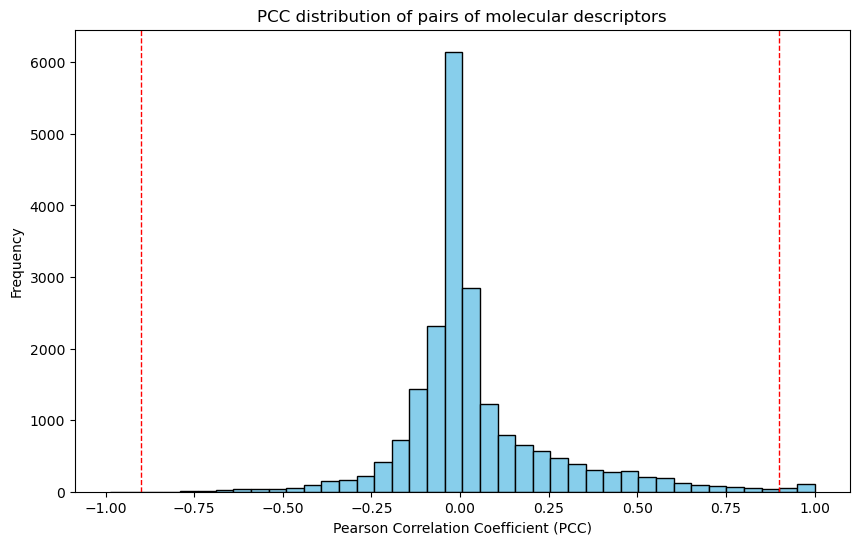

INFO:root:··· Total number of correlated descriptors = 38 ···
INFO:root:·······················································
INFO:root:··· Total number of descriptors to be removed =  97 ···


,CPD_INCHIKEY,desc_MaxAbsEStateIndex,desc_MinAbsEStateIndex,desc_MinEStateIndex,desc_qed,desc_SPS,desc_MaxPartialCharge,desc_MaxAbsPartialCharge,desc_FpDensityMorgan3,desc_BCUT2D_MWHI,...,desc_fr_bicyclic,desc_fr_ester,desc_fr_ether,desc_fr_halogen,desc_fr_methoxy,desc_fr_para_hydroxylation,desc_fr_pyridine,desc_fr_sulfide,desc_fr_sulfonamd,desc_fr_urea
0,VGLGVJVUHYTIIU-UHFFFAOYSA-N,12.247341,0.135792,-4.115388,0.513940,20.000000,0.243918,0.367098,2.727273,35.495694,...,1,0,0,1,0,0,0,1,2,0
1,QJHCTHPYUOXOGM-UHFFFAOYSA-N,11.214670,0.024667,-0.460630,0.644772,16.172414,0.077555,0.390803,1.896552,35.495692,...,0,0,0,1,0,0,0,0,0,0
2,WTRRIQCGCGCMQA-QEWMCDCGSA-N,12.237860,0.083404,-0.083404,0.774541,38.250000,0.138567,0.507944,3.000000,16.254713,...,5,0,0,0,0,0,0,0,0,0
3,AAOVKJBEBIDNHE-UHFFFAOYSA-N,12.024468,0.028237,-0.028237,0.791645,14.600000,0.247917,0.313200,2.650000,35.495691,...,1,0,0,1,0,0,0,0,0,0
4,WPVVMKYQOMJPIN-UHFFFAOYSA-N,5.831789,0.352254,0.352254,0.718944,18.571429,0.130989,0.356453,2.714286,35.495696,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30397,BSKZHQCAOYVBFU-HYZYYIOASA-N,13.519540,0.012389,-0.502222,0.563916,23.487179,0.257279,0.489958,2.666667,19.142151,...,2,0,2,1,0,0,0,0,0,0
30398,BSKZHQCAOYVBFU-SCTDOJESSA-N,13.519540,0.012389,-0.502222,0.563916,23.487179,0.257279,0.489958,2.666667,19.142151,...,2,0,2,1,0,0,0,0,0,0
30399,BSKZHQCAOYVBFU-RMDSEJHCSA-N,13.519540,0.012389,-0.502222,0.563916,23.487179,0.257279,0.489958,2.666667,19.142151,...,2,0,2,1,0,0,0,0,0,0
30400,BSKZHQCAOYVBFU-VXQMPNGUSA-N,13.519540,0.012389,-0.502222,0.563916,23.487179,0.257279,0.489958,2.666667,19.142151,...,2,0,2,1,0,0,0,0,0,0


In [2]:
# Compute RDKit 1D descriptors
rdkit_descriptors = compute_molecular_descriptors(data='1_data/CellPainting_data.csv', 
                                                  descriptor_type='1D_RDKit', descriptor_selection=True)
rdkit_descriptors

In [3]:
# Compute ECFP4 fingerprints
ecfp4_fingerprints = compute_molecular_descriptors(data='1_data/CellPainting_data.csv', 
                                                   descriptor_type='ECFP4', fpSize=1024, descriptor_selection=False)
ecfp4_fingerprints

INFO:root:Loading the input data...
INFO:root:### ECFP4 fingerprints ###
INFO:root:Constructing the RDKit Mol objects of all compounds...
INFO:root:··· Total number of Mol objects: 30402 ···
INFO:root:Computing the ECFP4 descriptor for every compound...
INFO:root:Creating the final dataframe...
INFO:root:# Descriptor selection #


,CPD_INCHIKEY,ecfp4_1,ecfp4_2,ecfp4_3,ecfp4_4,ecfp4_5,ecfp4_6,ecfp4_7,ecfp4_8,ecfp4_9,...,ecfp4_1015,ecfp4_1016,ecfp4_1017,ecfp4_1018,ecfp4_1019,ecfp4_1020,ecfp4_1021,ecfp4_1022,ecfp4_1023,ecfp4_1024
0,VGLGVJVUHYTIIU-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,QJHCTHPYUOXOGM-UHFFFAOYSA-N,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,WTRRIQCGCGCMQA-QEWMCDCGSA-N,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,AAOVKJBEBIDNHE-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WPVVMKYQOMJPIN-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30397,BSKZHQCAOYVBFU-HYZYYIOASA-N,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30398,BSKZHQCAOYVBFU-SCTDOJESSA-N,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30399,BSKZHQCAOYVBFU-RMDSEJHCSA-N,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30400,BSKZHQCAOYVBFU-VXQMPNGUSA-N,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Compute Mordred descriptors
mordred_descriptors = compute_molecular_descriptors(data='1_data/CellPainting_data.csv', 
                                                    descriptor_type='Mordred', descriptor_selection=True)
mordred_descriptors

INFO:root:Loading the input data...
INFO:root:### Mordred descriptors ###
INFO:root:Computing the Mordred descriptors for every compound...


KeyboardInterrupt: 